## ABOUT DATA:

Data contains details about loans between individuals through the Lending Club platform from 2007 to Q4 2018. It includes information about the specific accepted and rejected loans, such as the amount of the loan and the interest on the loan. It also includes information about the borrower of the loan, including income, home-ownership status, and more. 

The data is split into 2 files, one containing only information about accepted loans, the other information about rejected loans. I will be focusing on the accepted loans dataset.

## DATA GATHERING

In [1]:
import pandas as pd
import numpy as np

In [2]:
accepted_df = pd.read_csv("accepted_2007_to_2018Q4.csv",low_memory=False)

### Data Dictionary:

Descriptions of the features provided in the dataset. Accessed from

In [3]:
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None
pd.read_excel('LCDataDictionary.xlsx')

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


## DATA CLEANING, PREPROCESSING, & EXPLORATION

### Getting Sense for Data:

As seen below there are seems to be significant chunks of missing values in the dataset. Will investigate further.

In [4]:
# Cursory glance at dataset
accepted_df.head().T

,0,1,2,3,4
id,68407277,68355089,68341763,66310712,68476807
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,3600.0,24700.0,20000.0,35000.0,10400.0
funded_amnt,3600.0,24700.0,20000.0,35000.0,10400.0
funded_amnt_inv,3600.0,24700.0,20000.0,35000.0,10400.0
term,36 months,36 months,60 months,60 months,60 months
int_rate,13.99,11.99,10.78,14.85,22.45
installment,123.03,820.28,432.66,829.9,289.91
grade,C,C,B,C,F
sub_grade,C4,C1,B4,C5,F1


In [5]:
# Looking at data-types and null-values
accepted_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    id                                          2260701 non-null  object 
 1    member_id                                   0 non-null        float64
 2    loan_amnt                                   2260668 non-null  float64
 3    funded_amnt                                 2260668 non-null  float64
 4    funded_amnt_inv                             2260668 non-null  float64
 5    term                                        2260668 non-null  object 
 6    int_rate                                    2260668 non-null  float64
 7    installment                                 2260668 non-null  float64
 8    grade                                       2260668 non-null  object 
 9    sub_grade                                   

In [6]:
# Summary statistics
accepted_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,2260701,2260701,68407277,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2260668.0,NaN,NaN,NaN,15046.931228,9190.245488,500.0,8000.0,12900.0,20000.0,40000.0
funded_amnt,2260668.0,NaN,NaN,NaN,15041.664057,9188.413022,500.0,8000.0,12875.0,20000.0,40000.0
funded_amnt_inv,2260668.0,NaN,NaN,NaN,15023.437745,9192.331679,0.0,8000.0,12800.0,20000.0,40000.0
term,2260668,2,36 months,1609754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,2260668.0,NaN,NaN,NaN,13.092829,4.832138,5.31,9.49,12.62,15.99,30.99
installment,2260668.0,NaN,NaN,NaN,445.806823,267.173535,4.93,251.65,377.99,593.32,1719.83
grade,2260668,7,B,663557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,2260668,35,C1,145903,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# looking at unique counts for non-numeric variables to see if there are any constants
cat_feat = accepted_df.select_dtypes('object').columns.values
accepted_df[cat_feat].nunique().sort_values()

hardship_type                      1
initial_list_status                2
application_type                   2
disbursement_method                2
pymnt_plan                         2
debt_settlement_flag               2
hardship_flag                      2
term                               2
verification_status                3
hardship_status                    3
settlement_status                  3
verification_status_joint          3
hardship_loan_status               5
home_ownership                     6
grade                              7
loan_status                        9
hardship_reason                    9
emp_length                        11
purpose                           14
payment_plan_start_date           27
hardship_start_date               27
hardship_end_date                 28
sub_grade                         35
addr_state                        51
debt_settlement_flag_date         83
settlement_date                   90
next_pymnt_d                     106
l

In [8]:
# looking at unique counts for numeric variables to see if there are any constants
num_feat = accepted_df.select_dtypes('number').columns.values
accepted_df[num_feat].nunique().sort_values()

member_id                                           0
hardship_length                                     1
deferral_term                                       1
policy_code                                         1
num_tl_30dpd                                        5
num_tl_120dpd_2m                                    7
sec_app_inq_last_6mths                              7
acc_now_delinq                                      9
chargeoff_within_12_mths                           11
pub_rec_bankruptcies                               12
collections_12_mths_ex_med                         16
sec_app_collections_12_mths_ex_med                 18
open_il_12m                                        19
open_acc_6m                                        19
sec_app_chargeoff_within_12_mths                   22
sec_app_mort_acc                                   23
mths_since_recent_inq                              26
inq_last_6mths                                     28
open_rv_12m                 

In [9]:
# Looking at percent null of each feature
nulls = pd.DataFrame(round(accepted_df.isnull().sum()/len(accepted_df.index)*100,2),columns=['null_percent'])
nulls[nulls['null_percent']!=0.00].sort_values('null_percent',ascending=False)

,null_percent
member_id,100.00
orig_projected_additional_accrued_interest,99.62
hardship_dpd,99.52
hardship_status,99.52
deferral_term,99.52
hardship_amount,99.52
hardship_start_date,99.52
hardship_end_date,99.52
payment_plan_start_date,99.52
hardship_length,99.52


### Cleaning:

#### Some Initial Feature Processing

There are a some features that I know I should remove just from reviewing above information and the data dictionary.

**Features to Remove**

The id which is unique to every feature:
* id

The url link to view the loan which is unecessary:
* url

Some borrower provided categorical features - titles/descriptions that don't seem to follow any standard and would require a lot of cleaning to use:
* emp_title
* desc
* title

Features that have only one (or zero) values throughout the dataset:
* member_id
* policy_code

Features that are only present when there is a loan settlement (loan is already charged off, so redundant in this analysis):
* debt_settlement_flag 
* debt_settlement_flag_date 
* settlement_status 
* settlement_date 
* settlement_amount 
* settlement_percentage
* settlement_term
* recoveries
* collection_recovery_fee

Current loan status features and operational data that wouldn't be known at time of loan origination (such as how much of the loan is currently paid off, date of last payment towards loan, late fees, etc.):
* funded_amnt
* funded_amnt_inv
* last_pymnt_amnt
* out_prncp
* out_prncp_inv
* total_pymnt
* total_pymnt_inv
* total_rec_int
* total_rec_late_fee
* total_rec_prncp
* last_pymnt_d
* last_credit_pull_d
* next_pymnt_d

Other features that are not known at time of loan origination (such as whether the borrower will exprience a hardship):
* hardship_flag
* hardship_type
* hardship_reason
* hardship_status
* deferral_term
* hardship_amount
* hardship_start_date
* hardship_end_date
* payment_plan_start_date
* hardship_length
* hardship_dpd
* hardship_loan_status
* orig_projected_additional_accrued_interest
* hardship_payoff_balance_amount
* hardship_last_payment_amount
* num_tl_120dpd_2m (described as updated in past 2 months, so not present at loan origination)
* num_tl_30dpd (updated in past 2 months)
* last_fico_range_low (current credit score. Not known at origintion, is affected by whether the loan is defaulted)
* last_fico_range_high (current credit score.  Not known at origintion, is affected by whether the loan is defaulted)

Other features to drop:
* zip_code (I don't think this will have much information in regards to classifying loans, and I already will include state data. Also this is categorical with too many levels)

In [10]:
loans_df = accepted_df.drop(['id', 'url', 'emp_title', 'desc', 'title', 'member_id', 'policy_code',
                                   
                                  'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 
                                   'settlement_date', 'settlement_amount', 'settlement_percentage', 
                                   'settlement_term','recoveries', 'collection_recovery_fee',
                                  
                                  'funded_amnt', 'funded_amnt_inv', 'last_pymnt_amnt', 'out_prncp',
                                   'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
                                   'total_rec_late_fee', 'total_rec_prncp', 'last_pymnt_d', 'last_credit_pull_d',
                                   'next_pymnt_d',
                                   
                                   'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
                                   'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date',
                                   'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status',
                                   'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount',
                                   'hardship_last_payment_amount', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'last_fico_range_low',
                                   'last_fico_range_high',
                                   
                                   'zip_code'], axis=1)

#### Dealing with Nulls:

This data has many many features that are largely null for the majority of the data (for various reasons).

**Looking at the Null percentages for each remaining feature:**

In [11]:
# Looking at percent null of each feature
nulls = pd.DataFrame(round(loans_df.isnull().sum()/len(loans_df.index)*100,2),columns=['null_percent'])
nulls[nulls['null_percent']!=0.00].sort_values('null_percent',ascending=False)

,null_percent
sec_app_mths_since_last_major_derog,98.41
sec_app_revol_util,95.30
sec_app_mort_acc,95.22
sec_app_inq_last_6mths,95.22
sec_app_earliest_cr_line,95.22
sec_app_fico_range_high,95.22
sec_app_fico_range_low,95.22
revol_bal_joint,95.22
sec_app_open_act_il,95.22
sec_app_num_rev_accts,95.22


**Visualizing the Missing Data**

This will give me a better understanding of the distribution of the null values in the dataset. Will only do this for features that are greater than 15% null as there are very many features and these are the primary ones of interest in this visual.

As seen from the visualizations below, there are categories of features that are null for the same groups of records.

In [12]:
# collect features that are >15% null
nulls = pd.DataFrame(round(loans_df.isnull().sum()/len(loans_df.index)*100,2),columns=['null_percent'])
more_than_15pctnull = nulls[nulls['null_percent']>15.0].index

# convert loan issue date column to date_time object
loans_df['issue_d'] = pd.to_datetime(loans_df['issue_d'], format='%b-%Y')

<Axes: >

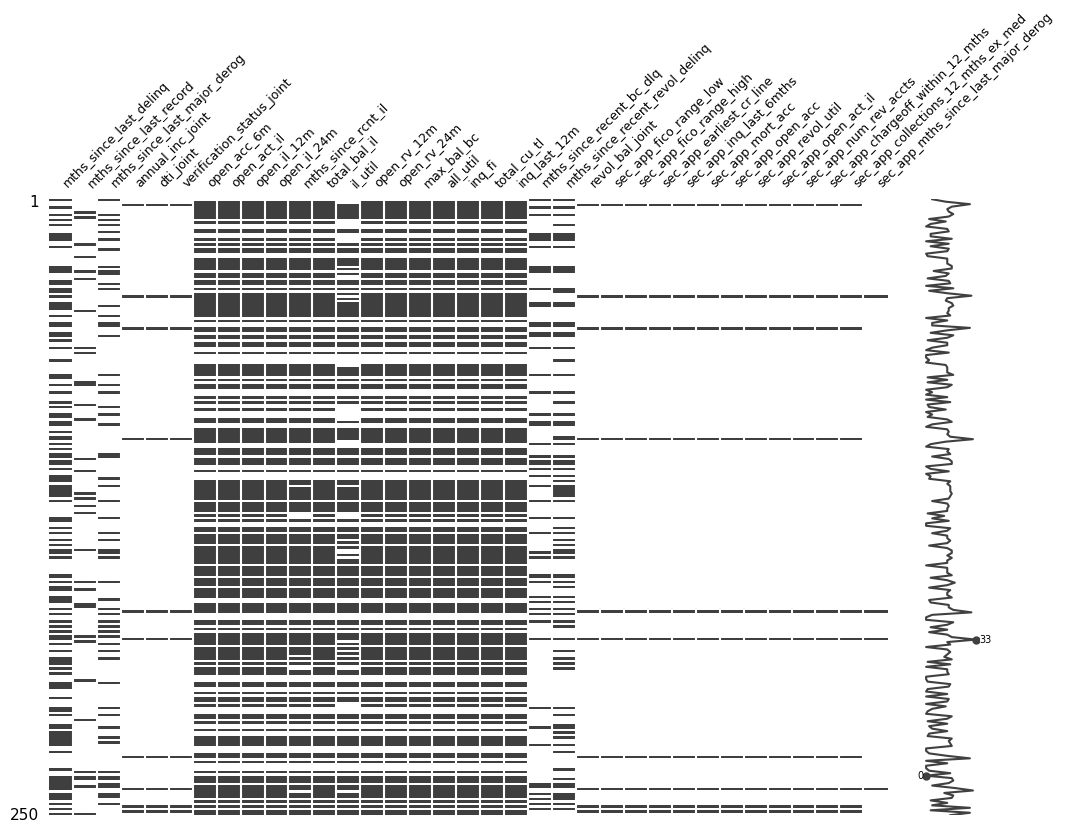

In [13]:
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

msno.matrix(loans_df[more_than_15pctnull].sample(250), figsize=(12, 8), fontsize=9)

<Axes: >

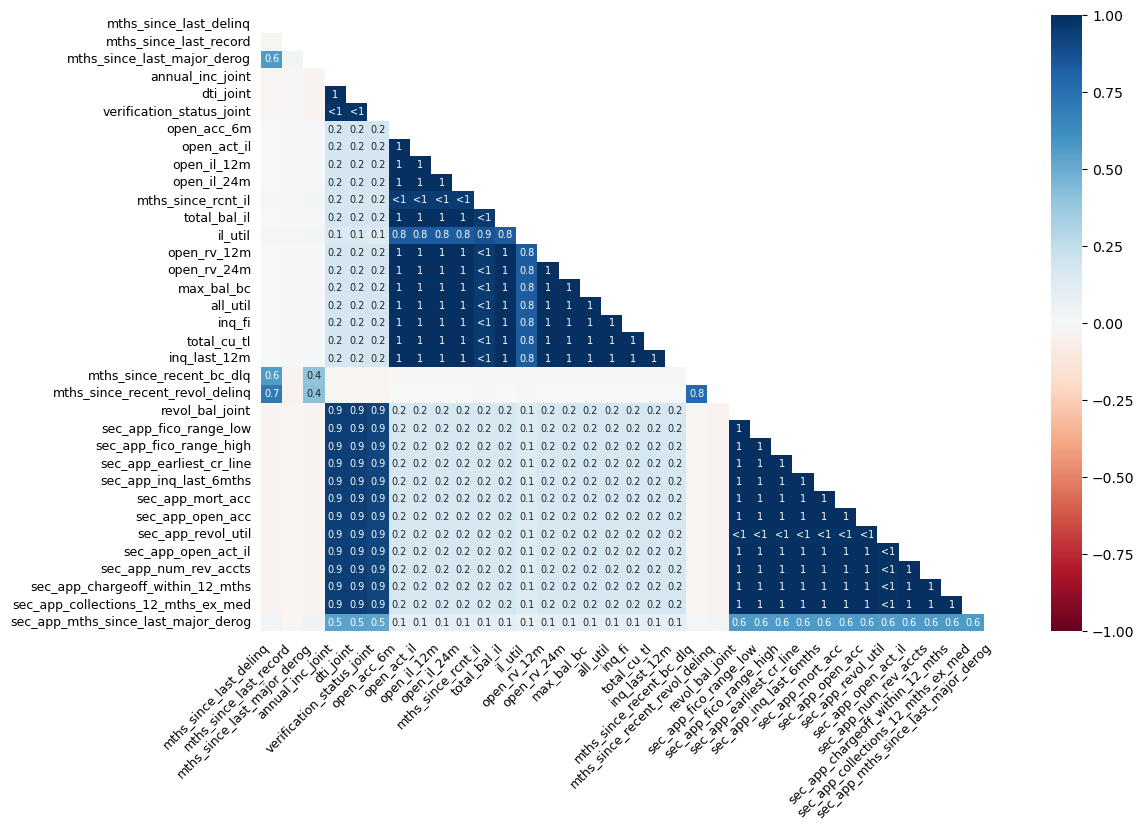

In [14]:
msno.heatmap(loans_df[more_than_15pctnull], figsize=(12, 8), fontsize=9)

**Since these features are all missing from the same records, find out how they are connected** 

From the descriptions, they mostly appear to contain informationa regarding inquries, counts, balances, and creations of joint accounts, multiple accounts, trades, or cards. I tried to find if the presence of these features in a records was dependant on some other feature's value (similar to how "hardship" features were only present if the hardship flag was "y") but there doesn't seem to be any such relationship to these features in the dataset.

After some research, it appears that some of the features were only collected during certain time periods.

I will plot the highly null variables (>15% null) vs time to see which are those that are missing during certain lengths of time.

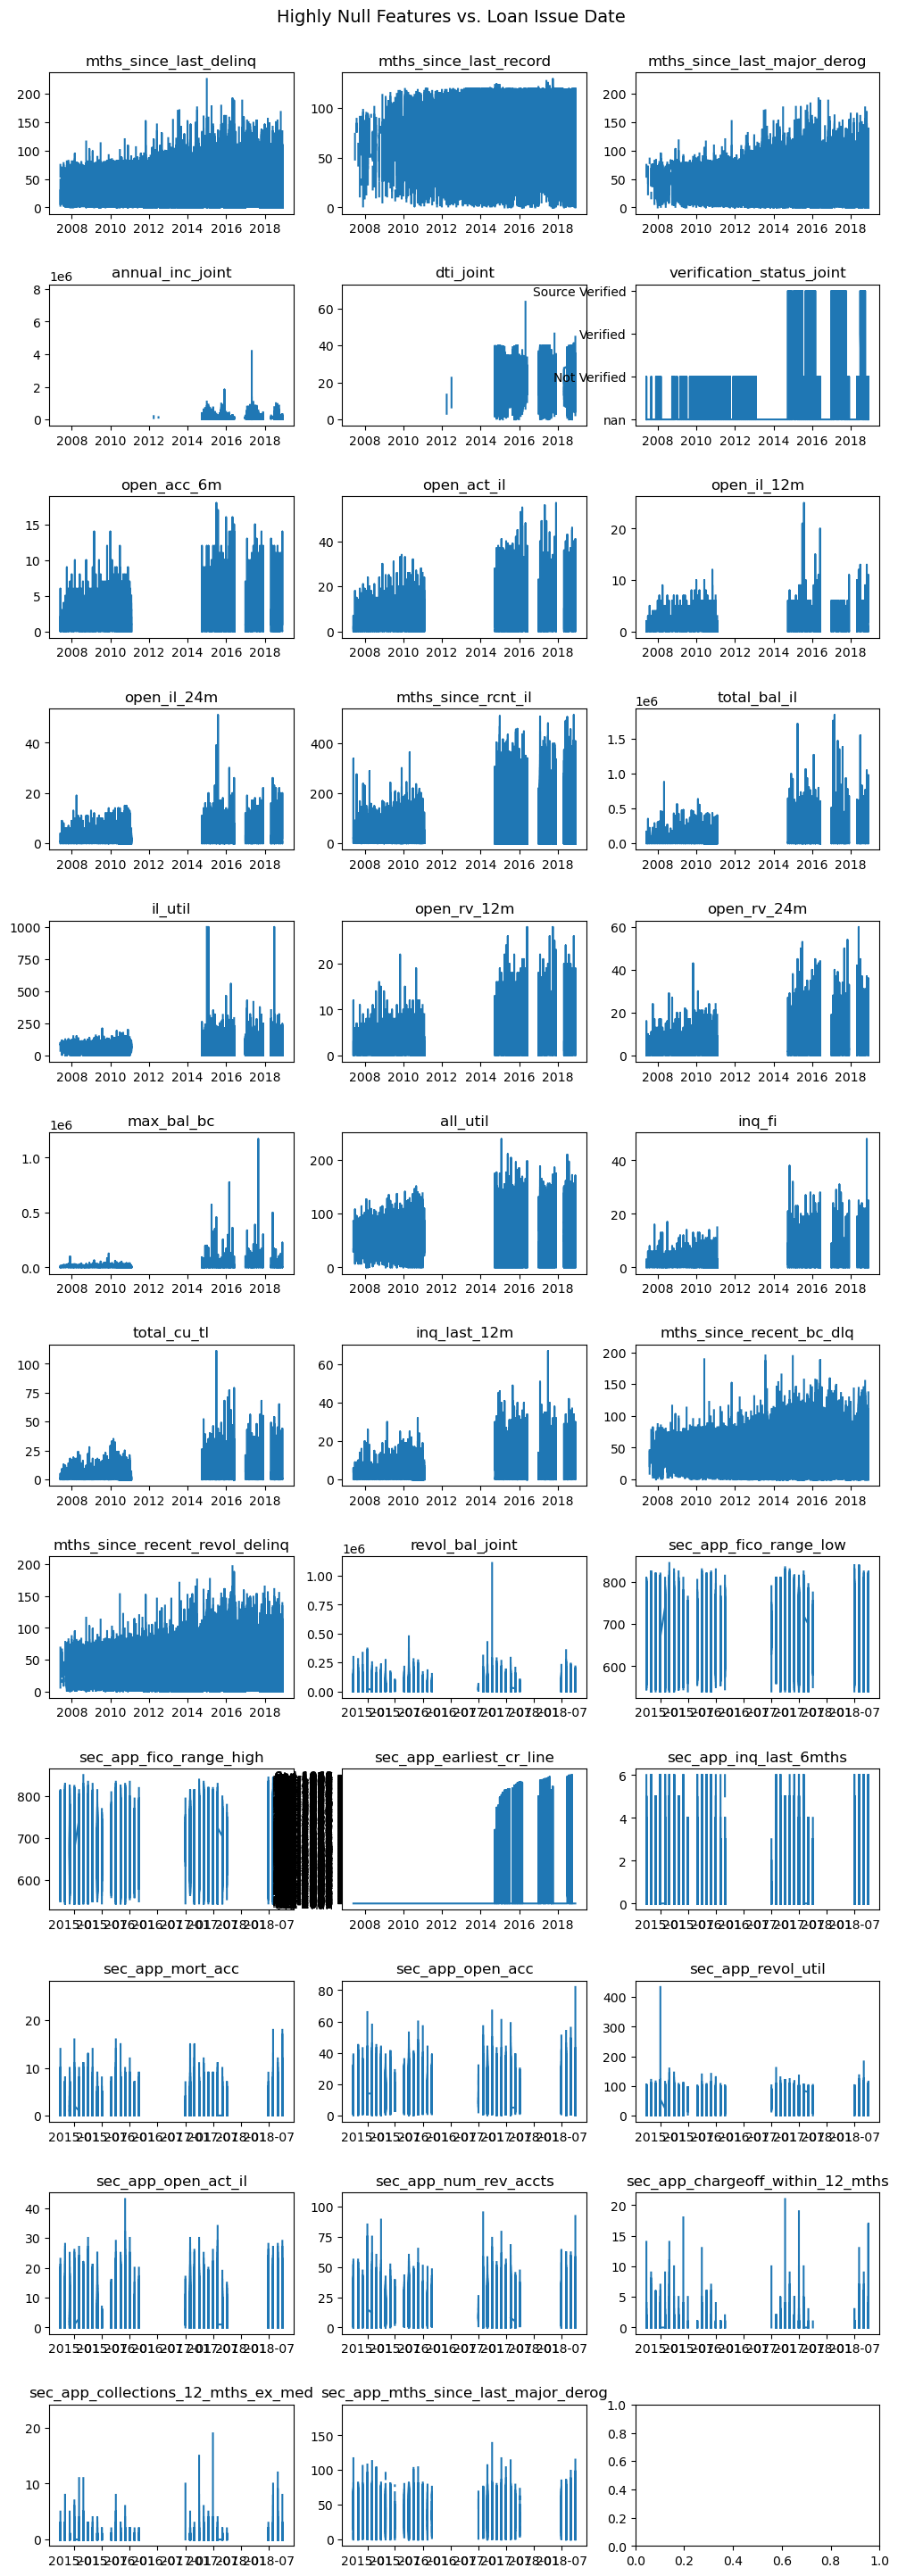

In [15]:
# plot high-nullity variables vs. time
fig, axs = plt.subplots(nrows=12, ncols=3, figsize=(12, 36))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Highly Null Features vs. Loan Issue Date", fontsize=14, y=.9)

for i, ax in zip(more_than_15pctnull, axs.ravel()):
    if type(loans_df[i][0]) == np.float64:
        ax.plot(loans_df['issue_d'].sort_values(), loans_df[i])
    else:
        ax.plot(loans_df['issue_d'].sort_values(), loans_df[i].astype(str))
    ax.set_title(i)

**From the plots above, we can see that many of the features are missing for the same large periods of time, particularly between ~2011-2015, as well as smaller periods throughout the length of the dataset.** 

For whatever reason, it appears that the lending club collected this information on-and-off throughout the time that this data was collected.

I will simply remove these features to deal with these nulls, as this is a very large chunk of data. Since I primarily wish to analyze and compare loans that have either been fully paid off or charged off, and older loans are are more likely to be completed loans in one of these two categories, I would like to keep the records that are null for these features.

There are two blocks of features to remove. 
* Informationa regarding inquries, counts, balances, and creations of multiple accounts, trades, or cards
* Information regarding loans with mutliple borrowers.

The features to remove are the following:
* annual_inc_joint
* dti_joint
* verification_status_joint
* open_acc_6m
* open_act_il
* open_il_12m
* open_il_24m
* mths_since_rcnt_il
* total_bal_il
* il_util
* open_rv_12m
* open_rv_24m
* max_bal_bc
* all_util
* inq_fi
* total_cu_tl
* inq_last_12m
* revol_bal_joint
* sec_app_fico_range_low
* sec_app_fico_range_high
* sec_app_earliest_cr_line
* sec_app_inq_last_6mths
* sec_app_mort_acc
* sec_app_open_acc
* sec_app_revol_util
* sec_app_open_act_il
* sec_app_num_rev_accts
* sec_app_chargeoff_within_12_mths
* sec_app_collections_12_mths_ex_med
* sec_app_mths_since_last_major_derog

In [16]:
loans_df1 = loans_df.drop(['annual_inc_joint', 'dti_joint', 'verification_status_joint',
                                   'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
                                   'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
                                   'open_rv_24m', 'max_bal_bc','all_util', 'inq_fi', 'total_cu_tl',
                                   'inq_last_12m', 'revol_bal_joint', 'sec_app_fico_range_low',
                                   'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
                                   'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il',
                                   'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
                                   'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog'], axis=1)

In [17]:
# Looking at percent null of each remaining feature
nulls = pd.DataFrame(round(loans_df1.isnull().sum()/len(loans_df1.index)*100,2),columns=['null_percent'])
nulls[nulls['null_percent']!=0.00].sort_values('null_percent',ascending=False)

,null_percent
mths_since_last_record,84.11
mths_since_recent_bc_dlq,77.01
mths_since_last_major_derog,74.31
mths_since_recent_revol_delinq,67.25
mths_since_last_delinq,51.25
mths_since_recent_inq,13.07
emp_length,6.50
mo_sin_old_il_acct,6.15
bc_util,3.37
percent_bc_gt_75,3.34


**Many of the remaining features have the prefix "months_since" or "mo_sin"** 

Based off the nature of these features, I will assume that the relevant event never occured.

For example, if mths_since_last_delinq is missing, we can assume that the borrower has never been delinquent on a loan.

These features include:
* mths_since_last_record
* mths_since_recent_bc_dlq
* mths_since_last_major_derog
* mths_since_recent_revol_delinq
* mths_since_last_delinq
* mths_since_recent_inq
* mo_sin_old_il_acct
* mths_since_recent_bc
* mo_sin_rcnt_tl
* mo_sin_rcnt_rev_tl_op
* mo_sin_old_rev_tl_op

There are a couple ways I think I can use imputation to deal with these features:
* Replace NULLs with maximum value (or maybe max+1 to distinguish from other records) of the features in the dataset
* Replace NULLs in feature with 0, and create a binary dummy variable alongside feature flagging whether or not the relevant feature is NULL (event never occured)

I will try the first since its simpler

In [18]:
fill_max = ['mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog',
            'mths_since_recent_revol_delinq', 'mths_since_last_delinq', 'mths_since_recent_inq',
            'mo_sin_old_il_acct', 'mths_since_recent_bc', 'mo_sin_rcnt_tl', 'mo_sin_rcnt_rev_tl_op',
            'mo_sin_old_rev_tl_op']

# make copy of clean dataset so can more quickly try other imputation methods
loans_df2 = loans_df1

# replace nulls in months_since cols with max values of cols
loans_df2[fill_max] = loans_df2[fill_max].fillna(loans_df2[fill_max].max()+1)

In [19]:
nulls = pd.DataFrame(round(loans_df2.isnull().sum()/len(loans_df2.index)*100,2),columns=['null_percent'])
nulls[nulls['null_percent']!=0.00].sort_values('null_percent',ascending=False)

,null_percent
emp_length,6.50
bc_util,3.37
percent_bc_gt_75,3.34
bc_open_to_buy,3.32
pct_tl_nvr_dlq,3.12
num_actv_rev_tl,3.11
tot_hi_cred_lim,3.11
num_tl_op_past_12m,3.11
num_tl_90g_dpd_24m,3.11
num_rev_tl_bal_gt_0,3.11


**Remaining Nulls**

The next most null feature is employment length (emp_length):
* Looking at the categories of this feature, it is fair to assume that NULL values correspond to borrowers who are not employed. 
* I will replace the NULL values in this feature with an "unemployed" category

In [20]:
loans_df2['emp_length'] = loans_df2['emp_length'].fillna('unemployed')
loans_df2['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '< 1 year',
       'unemployed'], dtype=object)

**The remaining features with null values are all numeric, and have low nullity.**
* I have removed or imputed most of the highly null features in the dataset
* The remaining records with any null values account for only 4.35% of the data.
* Given the size of the dataset, I think it is fair to simply remove these records

In [21]:
# calculate percent of records with null values
100 - ((loans_df2.dropna().shape[0] / loans_df2.shape[0]) *100)

4.349712766084508

In [22]:
# dropping the columns with too many nulls
loans_df3 = loans_df2.dropna()
loans_df3 = loans_df3.reset_index()

In [23]:
# drop index column
loans_df3 = loans_df3.drop('index', axis=1)

#### Processing Some Remaining Features

Converting features to correct data types and combining date features

In [24]:
# converting remaining date feature to datetime
loans_df3['earliest_cr_line'] = pd.to_datetime(loans_df3['earliest_cr_line'], format='%b-%Y')

Realized that I have some timeseries features that may not be useful and don't let me scale the data: 'issue date' and 'earliest credit line'.

I will create a new feature called credit_age (recording the age of the credit earliest credit line at loan origination) which will combine these two features, and then I will drop them.

In [25]:
loans_df3['credit_age'] = loans_df3['issue_d'] - loans_df3['earliest_cr_line']

# remove "days" and convert to int64
loans_df3['credit_age'] = loans_df3['credit_age'].apply(lambda x: x.days)
loans_df3 = loans_df3.drop(['issue_d', 'earliest_cr_line'], axis=1)

**Looking at the levels for the remaining categorical features:**

In [26]:
print("\n\nVisualizing unique values for categorical variables")
for col in loans_df3.dtypes[loans_df3.dtypes!='float64'].index.tolist():
    if not col in['issue_d', 'earliest_cr_line']:
        print("\n", col)
        print(loans_df3[col].unique())



Visualizing unique values for categorical variables

 term
[' 36 months' ' 60 months']

 grade
['C' 'B' 'F' 'A' 'E' 'D' 'G']

 sub_grade
['C4' 'C1' 'B4' 'C5' 'F1' 'C3' 'B2' 'B1' 'A2' 'B5' 'C2' 'E2' 'A4' 'E3'
 'A1' 'D4' 'F3' 'D1' 'B3' 'E4' 'D3' 'D2' 'D5' 'A5' 'F2' 'E1' 'F5' 'E5'
 'A3' 'G2' 'G1' 'G3' 'G4' 'F4' 'G5']

 emp_length
['10+ years' '3 years' '4 years' '6 years' '1 year' '7 years' '8 years'
 '5 years' '2 years' '9 years' '< 1 year' 'unemployed']

 home_ownership
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE' 'OTHER']

 verification_status
['Not Verified' 'Source Verified' 'Verified']

 loan_status
['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default']

 pymnt_plan
['n' 'y']

 purpose
['debt_consolidation' 'small_business' 'home_improvement' 'major_purchase'
 'credit_card' 'other' 'house' 'vacation' 'car' 'medical' 'moving'
 'renewable_energy' 'wedding' 'educational']

 addr_state
['PA' 'SD' 'IL' 'NJ' 'GA' 'MN' 'SC' 'RI' 'TX' 'NC' 'C

**From the feature categories above:**

**Loan_status** flags the current status of the loan, and will be my target variable:
* There are 7 categories in this variable
* I would like to transform this variable into one with only 2 categories:
  * defaulted: True or False
  * I can do this by looking at the information regarding note statuses on the lending club website: https://www.lendingclub.com/help/investing-faq/what-do-the-different-note-statuses-mean
    * *Current* - the loan is up to date on all outstanding payments.
    * *In Grace Period* - the loan is past due but within the 15-day grace period. LendingClub sends reminders to the member that their loan payment is past due.
    * *Late (16-30)* - the loan hasn’t been current for 16–30 days. This is the first tranche of loan delinquency.
    * *Late (31–120)* - the loan hasn’t been current for 31–120 days. This is the second tranche of loan delinquency. Starting with this tranche, our servicing team attempts to contact the member to collect on the debt more frequently, within the guidelines permitted by consumer protection law.
    * *Default* - the loan has not been current for more than 120 days. A loan in default status still appears in your Notes, but at this point, in most cases, LendingClub will begin the process to charge off the loan.
    * *Charged Off* - LendingClub charges off a loan when we no longer reasonably expect further payments. Generally, charge-offs occur no later than 30 days after the loan enters Default status. Once a loan is charged off, the remaining principal balance of the Note is deducted from the account balance. In certain circumstances, loans may be charged off at an earlier or later date. Loans held by members who have filed for bankruptcy may be charged off earlier based on the date of bankruptcy notification.
    * *Fully Paid* - the loan has been fully repaid, either at the end of the loan term or earlier because of prepayment.
    
It seems that **grade** and **sub_grade** are ordinal variables.
* I will therefore use an integer encoding to represent the levels of these features

The rest of the categorical features don't seem to be ordinal, so I will create dummy variables for them

**Creating Binary Target Variable:**

There are a couple ways I could group the categories of the loan_status variable into just two classes:
* I could set loans that are up to date (current) and loans that are fully paid as not-defaulted, and every other class (which indicate the loan is past due or worse) as defaulted
  * Pros: This lets me keep all the records
  * Cons: Will likely dilute the distinguishing features of these two classes as it will include many different states of loans. Also will include current loans, so those that may soon end up defaulted or past due but it just hasn't happened yet
* I could could include only loans that have been declared Defaulted and Charged Off  (as that seems to indicate a loan in default for a while) and Fully paid loans.
  * Pros: There is likely greater distinction between these categories of loans. It's my primary goal to predict default, so may as well accurately use lending clubs definition of what a default is.
  * Cons: I will lose many of the records in my dataset. Might make it even more imbalanced.

In [27]:
#---------------------------------------
# CREATING NEW 'DEFAULT' TARGET VARIABLE
#---------------------------------------

# from the descriptions of the different statuses, I will categorize:
# "In grace Period", "Late (16-30)", "Late (31–120)", "Default", and "Charged Off" as defaulted loans
defaulted = {"Default": 'True', 
             "Charged Off": 'True',
            "Fully Paid": 'False'}

keys = list(defaulted.keys())

loans_df3["default"] = loans_df3["loan_status"].map(defaulted)
trgt = loans_df3['loan_status'].isin(['Default', 'Charged Off', 'Fully Paid'])
clean_loans_df = loans_df3[trgt]

In [28]:
clean_loans_df.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,credit_age,default
count,1.262541e+06,1262541,1.262541e+06,1.262541e+06,1262541,1262541,1262541,1262541,1.262541e+06,1262541,...,1.262541e+06,1.262541e+06,1.262541e+06,1.262541e+06,1.262541e+06,1.262541e+06,1.262541e+06,1262541,1.262541e+06,1262541
unique,NaN,2,NaN,NaN,7,35,12,6,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,NaN,36 months,NaN,NaN,B,C1,10+ years,MORTGAGE,NaN,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,NaN,False
freq,NaN,956950,NaN,NaN,367730,80516,420469,627698,NaN,497824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1255690,NaN,1007475
mean,1.458161e+04,NaN,1.325953e+01,4.431840e+02,NaN,NaN,NaN,NaN,7.674599e+04,NaN,...,4.505145e+01,1.395812e-01,5.498118e-02,1.745723e+05,4.993327e+04,2.191092e+04,4.213502e+04,NaN,5.983898e+03,NaN
std,8.740196e+03,NaN,4.796413e+00,2.623807e+02,NaN,NaN,NaN,NaN,7.039590e+04,NaN,...,3.600288e+01,3.846779e-01,4.088009e-01,1.776692e+05,4.789925e+04,2.159170e+04,4.326823e+04,NaN,2.748624e+03,NaN
min,1.000000e+03,NaN,5.310000e+00,4.930000e+00,NaN,NaN,NaN,NaN,1.600000e+01,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,NaN,1.096000e+03,NaN
25%,8.000000e+03,NaN,9.750000e+00,2.524000e+02,NaN,NaN,NaN,NaN,4.600000e+04,NaN,...,1.000000e+01,0.000000e+00,0.000000e+00,4.975100e+04,2.104900e+04,8.000000e+03,1.472200e+04,NaN,4.139000e+03,NaN
50%,1.200000e+04,NaN,1.274000e+01,3.786500e+02,NaN,NaN,NaN,NaN,6.500000e+04,NaN,...,4.290000e+01,0.000000e+00,0.000000e+00,1.125020e+05,3.751800e+04,1.530000e+04,3.167800e+04,NaN,5.418000e+03,NaN
75%,2.000000e+04,NaN,1.601000e+01,5.875500e+02,NaN,NaN,NaN,NaN,9.100000e+04,NaN,...,7.500000e+01,0.000000e+00,0.000000e+00,2.524000e+05,6.286800e+04,2.840000e+04,5.664200e+04,NaN,7.366000e+03,NaN


**Saving clean dataset for analysis:**

In [29]:
clean_loans_df.to_pickle('clean_loans_df.pkl')